In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [40]:
df = pd.read_csv('./datasets/unlisted_resampled_train_data.csv')
df2 = pd.read_csv('./datasets/unlisted_test_data.csv')

In [41]:
x_train = df[['자기자본순이익률', 'CASH FLOW 대 매출액비율', 'CASH FLOW 대 차입금비율', '매출액영업이익률', '매출액증가율', 
              '부채비율', '순운전자본비율', '이윤분배율', '자기자본구성비율', '차입금의존도', '도입기', '성장기', '성숙기', '쇠퇴기']]
x_test = df2[['자기자본순이익률', 'CASH FLOW 대 매출액비율', 'CASH FLOW 대 차입금비율', '매출액영업이익률', '매출액증가율', 
              '부채비율', '순운전자본비율', '이윤분배율', '자기자본구성비율', '차입금의존도', '도입기', '성장기', '성숙기', '쇠퇴기']]

y_train = df['부실판단']
y_test = df2['부실판단']

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

labels = x_train.columns

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train = pd.DataFrame(data=x_train, columns = labels)
x_test = pd.DataFrame(data=x_test, columns = labels)

In [43]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

if len(np.unique(y_test)) == 2:  # 이진 분류인 경우에만 ROC AUC 계산
    roc_auc = roc_auc_score(y_test, y_pred)
    

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 스코어: {f1:.2f}')
print(f'ROC AUC 스코어: {roc_auc:.2f}')


Accuracy: 0.663
Precision: 0.528
Recall: 0.645
F1 스코어: 0.58
ROC AUC 스코어: 0.66


In [44]:
# 피처 중요도 확인(회귀계수), 데이터프레임 만들고 내림차순 정렬
logit_fi = np.abs(model.coef_[0])
logit_fi_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': logit_fi})
logit_fi_df = logit_fi_df.sort_values(by='Importance', ascending=False)

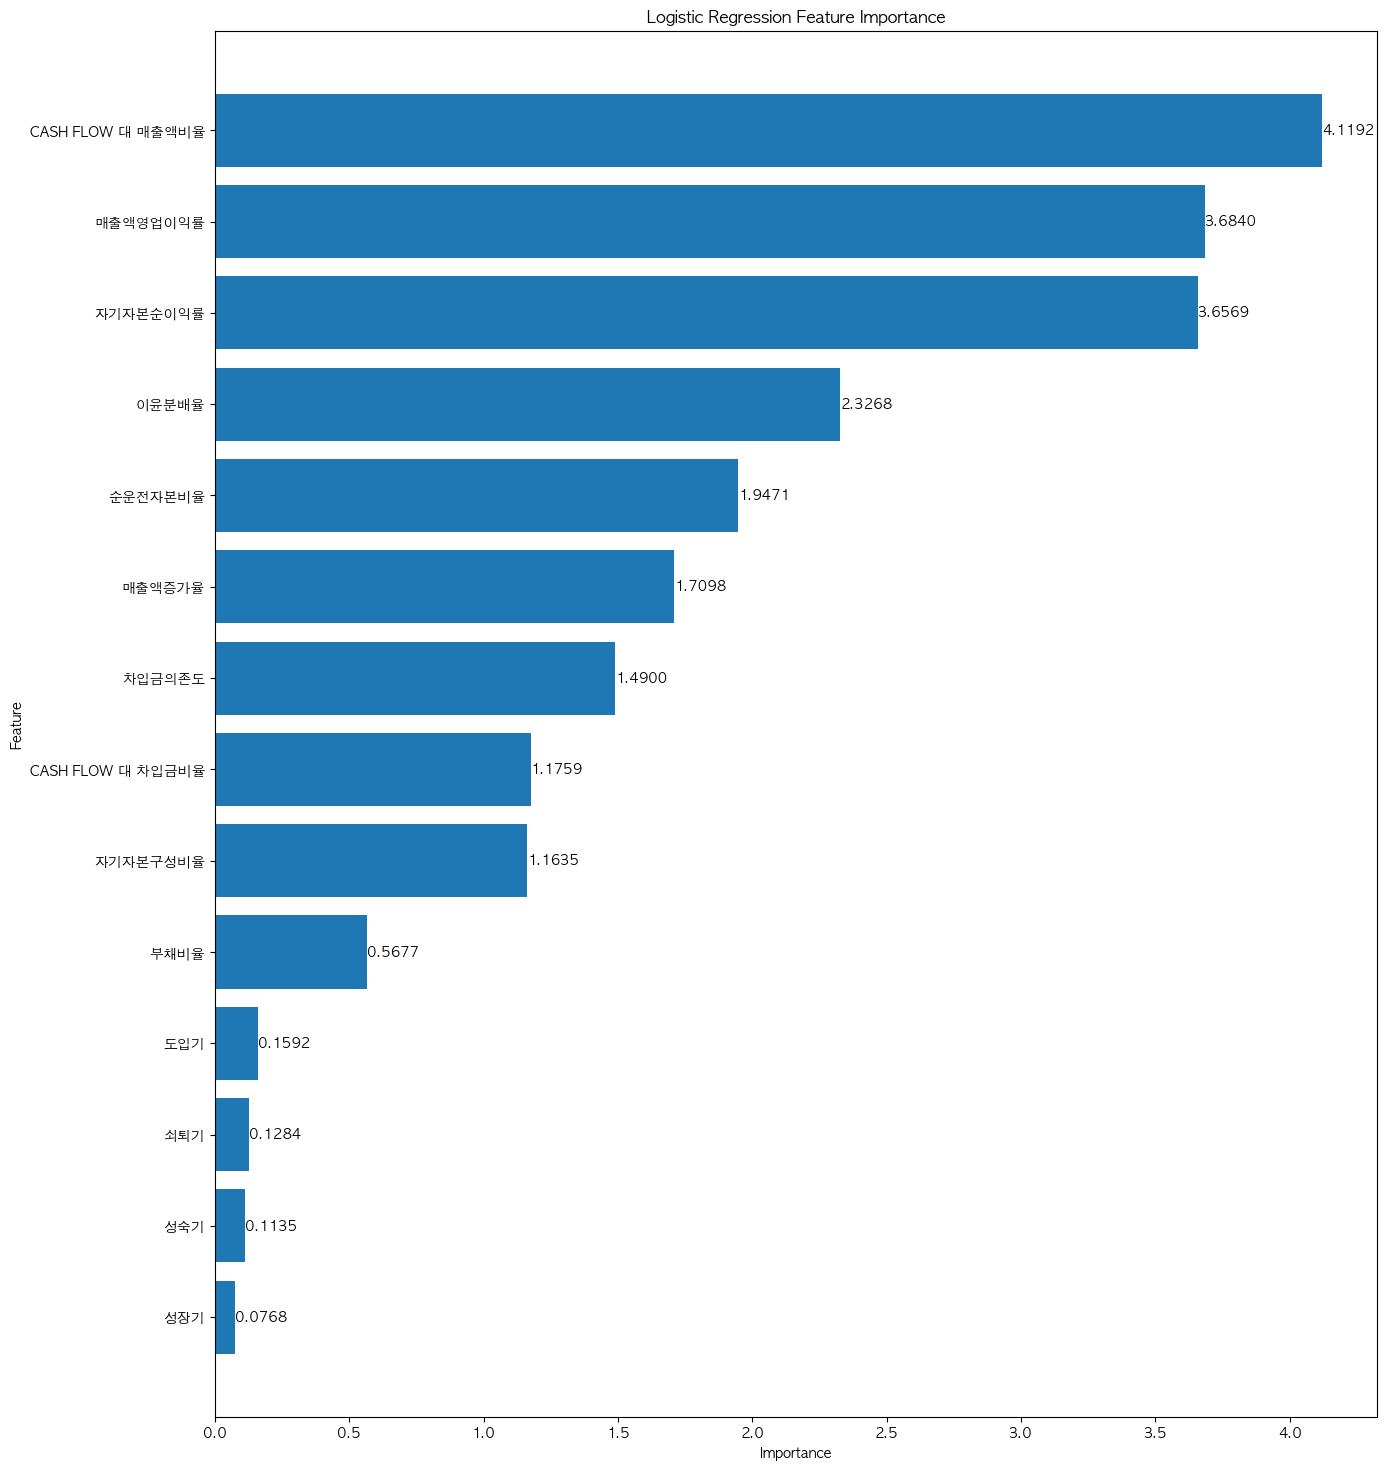

In [45]:
# 중요도 시각화
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(15, 18))
bars = plt.barh(logit_fi_df['Feature'], logit_fi_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Logistic Regression Feature Importance')
plt.gca().invert_yaxis()

# 피처 중요도 값 표시
for bar, importance in zip(bars, logit_fi_df['Importance']):
    plt.text(importance, bar.get_y() + bar.get_height()/2, f'{importance:.4f}', ha='left', va='center')

plt.show()

In [46]:
# Random Forest 모델 생성 및 학습
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

# 예측 및 성능 평가
y_pred_rf = rf_model.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

if len(np.unique(y_test)) == 2:
    roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print("Random Forest 모델 평가 지표:")
print(f'Accuracy: {accuracy_rf:.3f}')
print(f'Precision: {precision_rf:.3f}')
print(f'Recall: {recall_rf:.3f}')
print(f'F1 스코어: {f1_rf:.2f}')
if len(np.unique(y_test)) == 2:
    print(f'ROC AUC 스코어: {roc_auc_rf:.2f}')


Random Forest 모델 평가 지표:
Accuracy: 0.788
Precision: 0.680
Recall: 0.779
F1 스코어: 0.73
ROC AUC 스코어: 0.79


In [47]:
# AdaBoost 모델 생성 및 학습
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(x_train, y_train)

# 예측 및 성능 평가
y_pred_adaboost = adaboost_model.predict(x_test)

accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost)
recall_adaboost = recall_score(y_test, y_pred_adaboost)
f1_adaboost = f1_score(y_test, y_pred_adaboost)

if len(np.unique(y_test)) == 2:
    roc_auc_adaboost = roc_auc_score(y_test, y_pred_adaboost)

print("AdaBoost 모델 평가 지표:")
print(f'Accuracy: {accuracy_adaboost:.3f}')
print(f'Precision: {precision_adaboost:.3f}')
print(f'Recall: {recall_adaboost:.3f}')
print(f'F1 스코어: {f1_adaboost:.2f}')
if len(np.unique(y_test)) == 2:
    print(f'ROC AUC 스코어: {roc_auc_adaboost:.2f}')


AdaBoost 모델 평가 지표:
Accuracy: 0.775
Precision: 0.678
Recall: 0.719
F1 스코어: 0.70
ROC AUC 스코어: 0.76


In [48]:
from sklearn.ensemble import BaggingClassifier

# Bagging 모델 생성 및 학습
bagging_model = BaggingClassifier()
bagging_model.fit(x_train, y_train)

# 예측 및 성능 평가
y_pred_bagging = bagging_model.predict(x_test)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging)
recall_bagging = recall_score(y_test, y_pred_bagging)
f1_bagging = f1_score(y_test, y_pred_bagging)

if len(np.unique(y_test)) == 2:
    roc_auc_bagging = roc_auc_score(y_test, y_pred_bagging)

print("Bagging 모델 평가 지표:")
print(f'Accuracy: {accuracy_bagging:.3f}')
print(f'Precision: {precision_bagging:.3f}')
print(f'Recall: {recall_bagging:.3f}')
print(f'F1 스코어: {f1_bagging:.2f}')
if len(np.unique(y_test)) == 2:
    print(f'ROC AUC 스코어: {roc_auc_bagging:.2f}')


Bagging 모델 평가 지표:
Accuracy: 0.769
Precision: 0.675
Recall: 0.696
F1 스코어: 0.69
ROC AUC 스코어: 0.75


In [49]:
from sklearn.svm import SVC

# SVM 모델 생성 및 학습
svm_model = SVC()
svm_model.fit(x_train, y_train)

# 예측 및 성능 평가
y_pred_svm = svm_model.predict(x_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("SVM 모델 평가 지표:")
print(f'Accuracy: {accuracy_svm:.3f}')
print(f'Precision: {precision_svm:.3f}')
print(f'Recall: {recall_svm:.3f}')
print(f'F1 스코어: {f1_svm:.2f}')


SVM 모델 평가 지표:
Accuracy: 0.693
Precision: 0.577
Recall: 0.560
F1 스코어: 0.57


In [50]:
from lightgbm import LGBMClassifier

# LGBM 모델 생성 및 학습
lgbm_model = LGBMClassifier()
lgbm_model.fit(x_train, y_train)

# 예측 및 성능 평가
y_pred_lgbm = lgbm_model.predict(x_test)

accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm)
recall_lgbm = recall_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm)

print("LightGBM 모델 평가 지표:")
print(f'Accuracy: {accuracy_lgbm:.3f}')
print(f'Precision: {precision_lgbm:.3f}')
print(f'Recall: {recall_lgbm:.3f}')
print(f'F1 스코어: {f1_lgbm:.2f}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4333, number of negative: 4333
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000834 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2558
[LightGBM] [Info] Number of data points in the train set: 8666, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM 모델 평가 지표:
Accuracy: 0.793
Precision: 0.687
Recall: 0.787
F1 스코어: 0.73


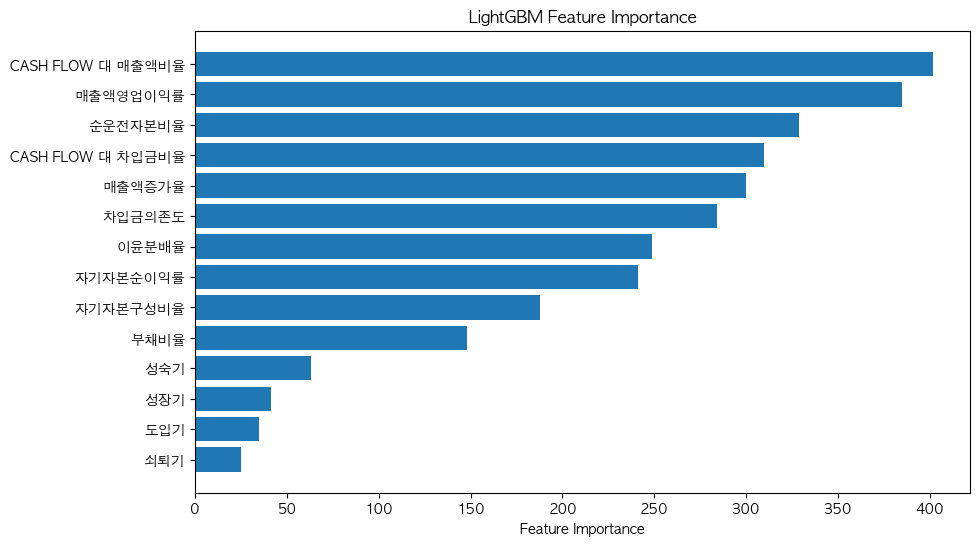

In [52]:
# 피처 중요도 확인
feature_importance = lgbm_model.feature_importances_

# 중요도를 피처 이름과 매핑하여 시각화
feature_names = x_train.columns
feature_importance_dict = dict(zip(feature_names, feature_importance))

# 중요도를 기준으로 내림차순 정렬
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=False)

# 시각화를 위한 피처 중요도 그래프
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), [val[1] for val in sorted_features], align='center')
plt.yticks(range(len(sorted_features)), [val[0] for val in sorted_features])
plt.xlabel('Feature Importance')
plt.title('LightGBM Feature Importance')
plt.show()